<a href="https://colab.research.google.com/github/ashrotd/AIClassifierModel/blob/main/MLTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
print("Hello world")
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]

Hello world


In [ ]:
df = pd.read_csv("magic04.data", names=cols)
df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"] = (df["class"]=='g').astype(int)
df["class"]

0        1
1        1
2        1
3        1
4        1
        ..
19015    0
19016    0
19017    0
19018    0
19019    0
Name: class, Length: 19020, dtype: int64

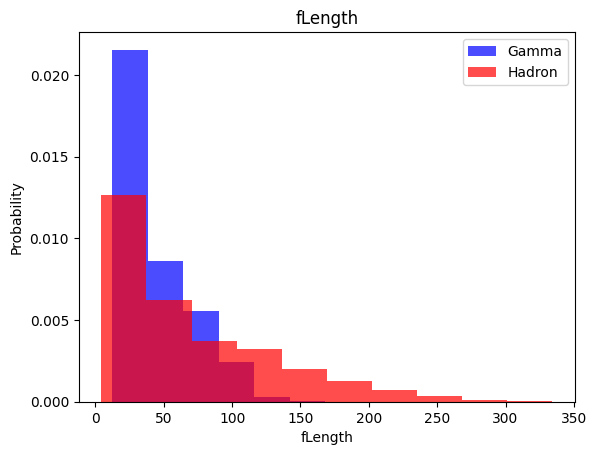

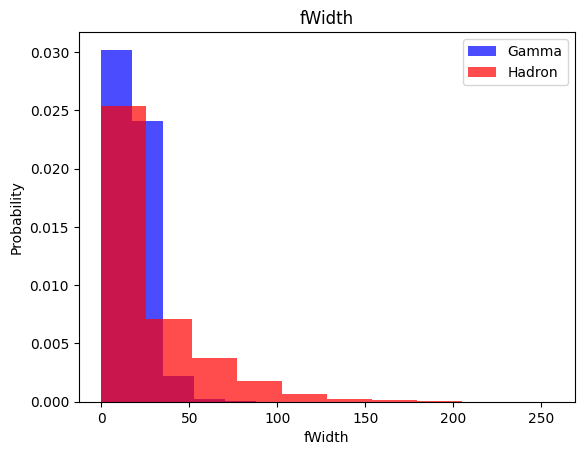

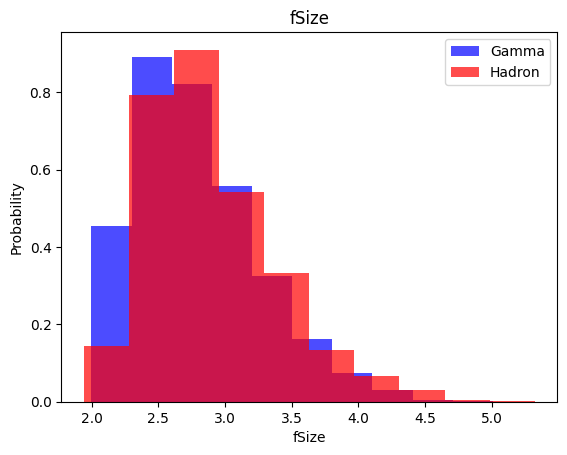

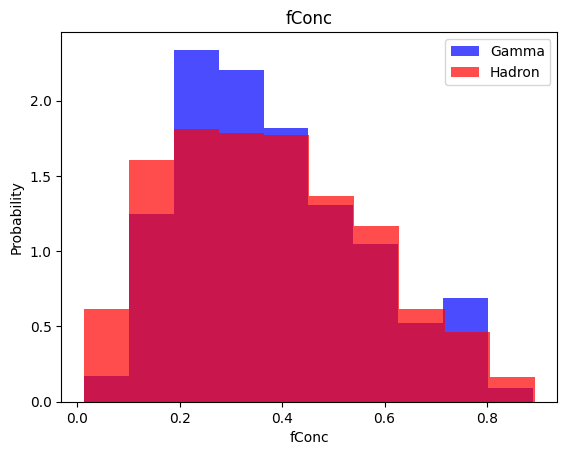

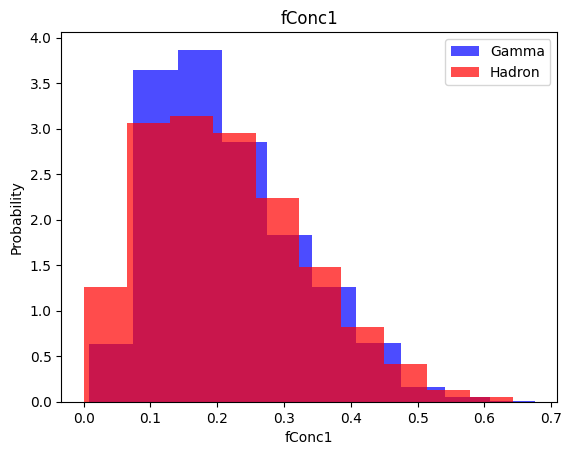

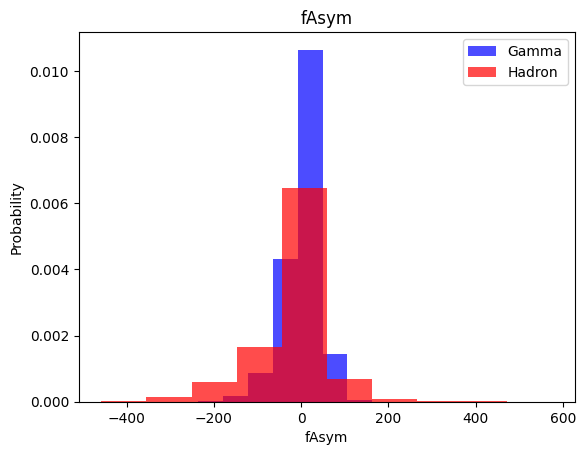

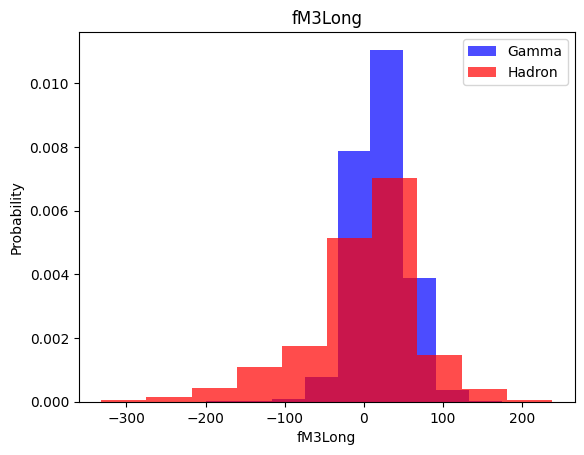

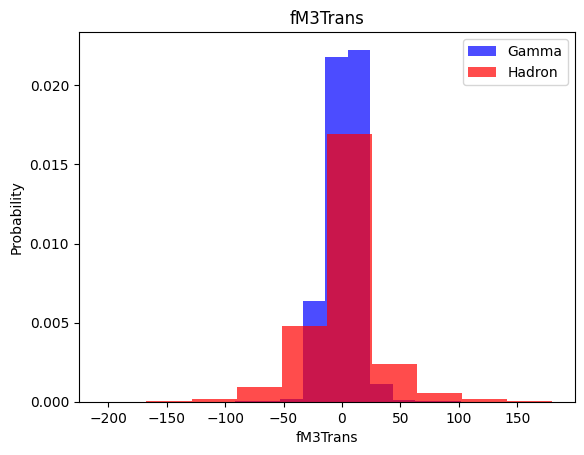

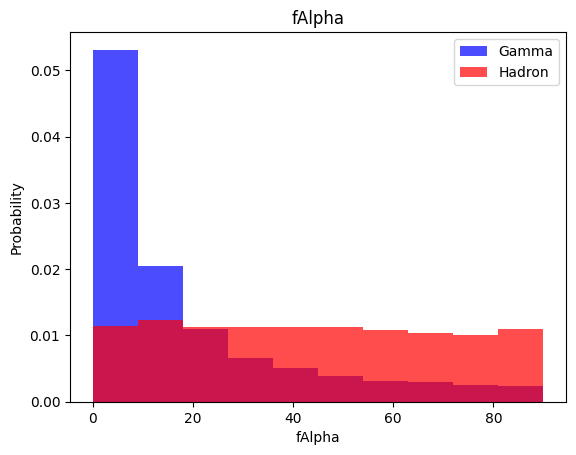

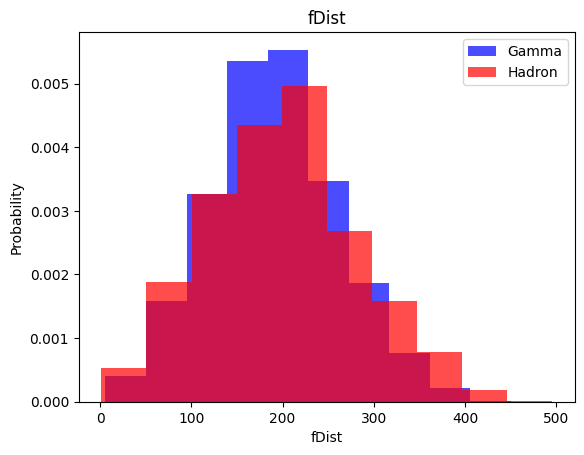

In [ ]:
for i in cols[:-1]:
    plt.hist(df[df["class"]==1][i],color='blue',label='Gamma',alpha=0.7,density=True)
    plt.hist(df[df["class"]==0][i],color='red',label='Hadron',alpha=0.7,density=True)
    plt.title(i)
    plt.ylabel("Probability")
    plt.xlabel(i)
    plt.legend()
    plt.show()

In [ ]:
#Train, Validation and Test set
train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe,oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    if oversample:
        ros = RandomOverSampler()
        x,y = ros.fit_resample(x,y)
    
    data = np.hstack((x,np.reshape(y,(-1,1))))
                     
    return data,x,y

In [ ]:
train,x_train,y_train = scale_dataset(train,oversample=True)
valid,x_valid,y_valid = scale_dataset(valid,oversample=False)
test,x_test,y_test = scale_dataset(test,oversample=False)

In [ ]:
#KNN implementation (K-nearest neighbours)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)
KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn_model.predict(x_test)


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1333
           1       0.84      0.89      0.86      2471

    accuracy                           0.82      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.82      0.81      3804



In [ ]:
#Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB


In [ ]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred=nb_model.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.69      0.42      0.52      1333
           1       0.74      0.90      0.81      2471

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = log_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1333
           1       0.85      0.83      0.84      2471

    accuracy                           0.80      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.80      0.80      0.80      3804



In [ ]:
#support vector machine (SVM)
from sklearn.svm import SVC


In [ ]:
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

In [ ]:
y_pred = svc_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1333
           1       0.89      0.90      0.90      2471

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



In [ ]:
def plot_history(history):
  fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary Crossentropy')
  ax1.legend()
  ax1.grid(True)
  

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid(True)
  plt.show()

In [ ]:
plot_history(history)

NameError: ignored

In [ ]:
def plot_loss(history):
  fig, (ax1,ax2) = plt.subplots(1,2)
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Binary Crossentropy')
  plt.legend()
  plt.grid(True)
  plt.show()
  

In [ ]:
def plot_accuracy(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
def train_model(x_train,y_train,num_nodes,dropout_prop,lr,batch_size,epochs):

  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prop),
    tf.keras.layers.Dense(num_nodes,activation='relu' ),
    tf.keras.layers.Dropout(dropout_prop),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',metrics=['accuracy'])
  history = nn_model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size, validation_split=0.2,verbose=0)
  return nn_model,history

In [ ]:
history = nn_model.fit(x_train,y_train,epochs=100,batch_size=32, validation_split=0.2,verbose=0)

In [ ]:
nn_model.evaluate(x_valid,y_valid)[0]

119/119 [==============================] - 0s 3ms/step - loss: 0.3147 - accuracy: 0.8741


0.3147256672382355

16 nodes, dropout0, lr0.01,batch_size 32


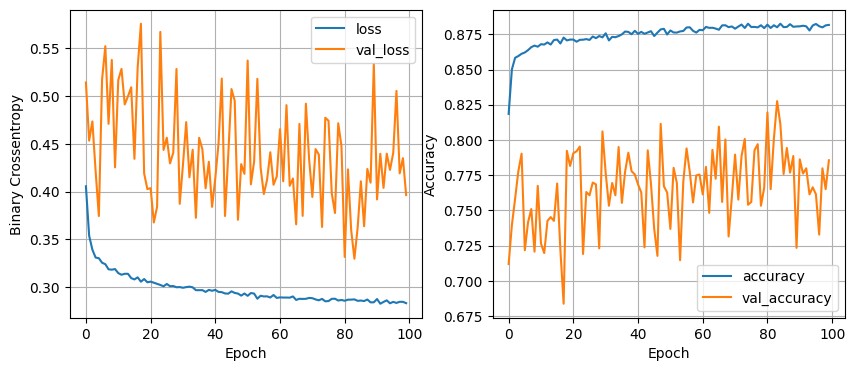

119/119 [==============================] - 0s 2ms/step - loss: 0.3412 - accuracy: 0.8657


TypeError: ignored

In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16,32,64]:
  for dropout_prop in [0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [32,64,125]:
        print(f"{num_nodes} nodes, dropout{dropout_prop}, lr{lr},batch_size {batch_size}")
        model,history = train_model(x_train,y_train,num_nodes,dropout_prop,lr,batch_size,epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid,y_valid)
        if val_loss < least_val_loss:
          least_loss_model = model
        

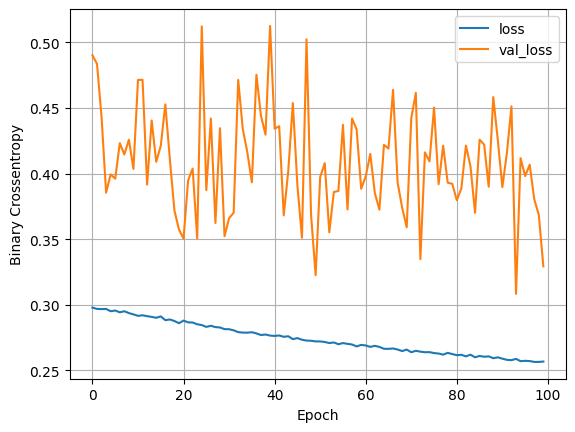

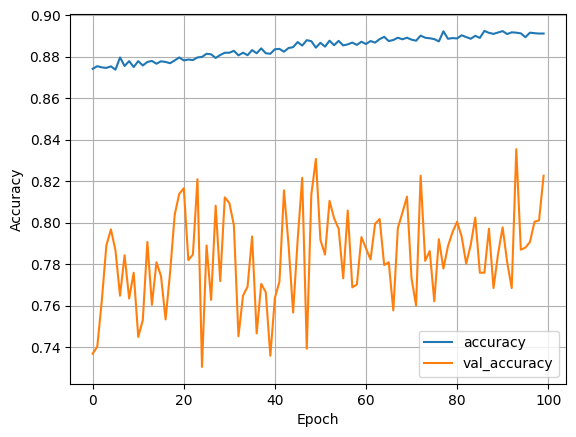

In [ ]:
plot_loss(history)
plot_accuracy(history)

In [8]:
#Regression
import copy
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [9]:
dataset_cols = ["count","hour","Temperature","Humidity","WindSpeed","Visibility","Dew Point Temp", "Radiation","Rain","Snow","Functional"]

In [10]:
df = pd.read_csv("SeoulBikeData.csv").drop(["Date","Holiday","Seasons"],axis=1)
df.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [11]:
df.columns = dataset_cols
df["Functional"] = (df["Functional"]=="Yes").astype(int)

In [12]:
df.head()

,count,hour,Temperature,Humidity,WindSpeed,Visibility,Dew Point Temp,Radiation,Rain,Snow,Functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1


In [13]:
df = df[df["hour"]==12]
df = df.drop(['hour'],axis=1)

In [14]:
df.head()

,count,Temperature,Humidity,WindSpeed,Visibility,Dew Point Temp,Radiation,Rain,Snow,Functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


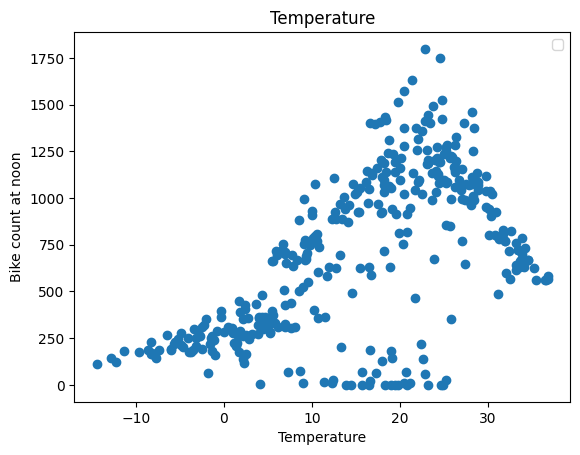

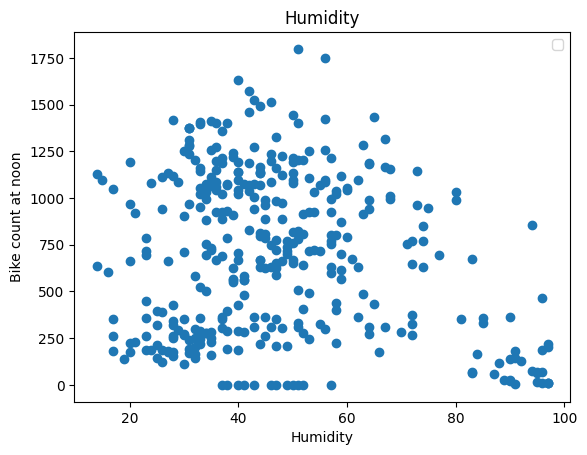

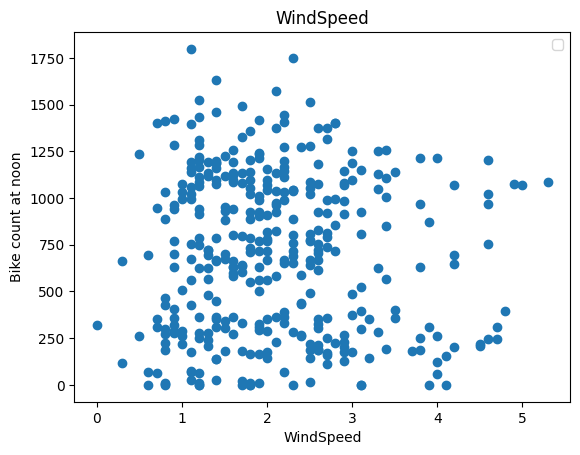

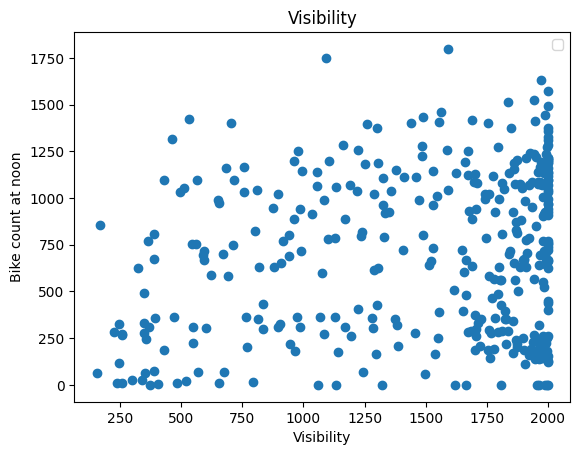

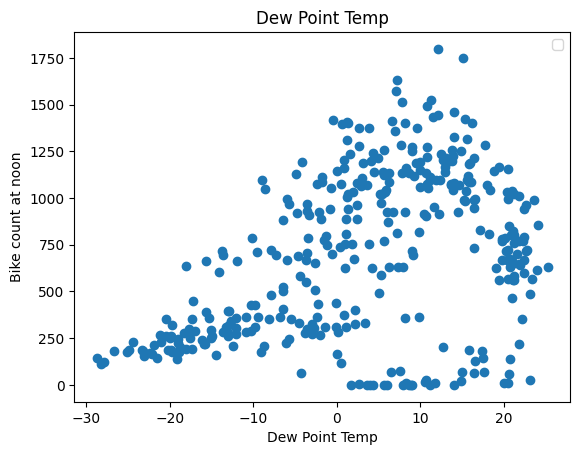

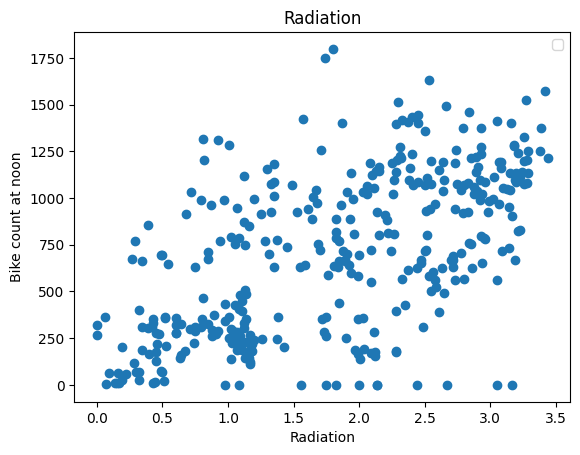

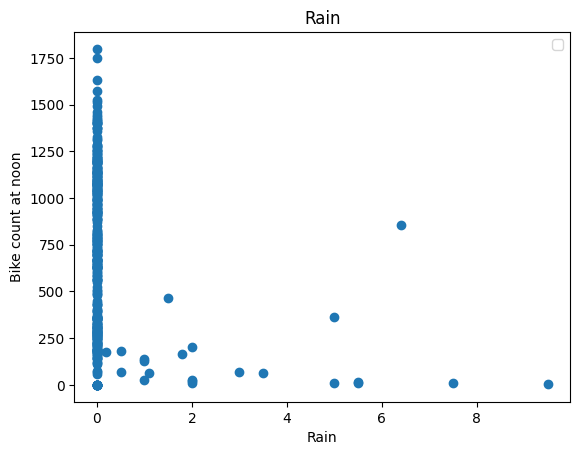

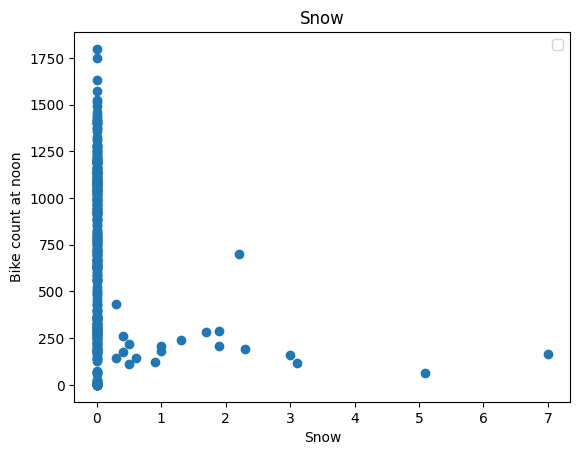

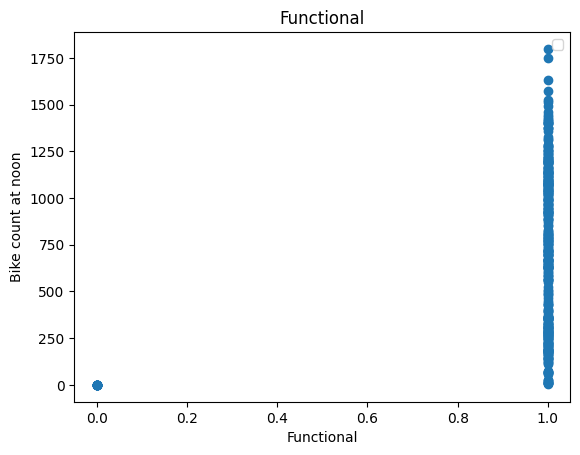

In [15]:
for i in df.columns[1:]:
  plt.scatter(df[i],df['count'])
  plt.title(i)
  plt.ylabel("Bike count at noon")
  plt.xlabel(i)
  plt.legend()
  plt.show()


In [16]:
df = df.drop(['WindSpeed','Visibility','Functional'],axis=1)

In [17]:
df.head()

,count,Temperature,Humidity,Dew Point Temp,Radiation,Rain,Snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


In [18]:
#Train, Val and test
train,val,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [19]:
train

,count,Temperature,Humidity,Dew Point Temp,Radiation,Rain,Snow
4908,1374,28.4,31,9.6,2.93,0.0,0.0
6540,768,27.0,74,21.9,0.94,0.0,0.0
684,363,4.3,62,-2.3,0.52,0.0,0.0
6780,1220,25.9,39,10.8,2.89,0.0,0.0
6420,1070,27.9,55,18.0,1.49,0.0,0.0
...,...,...,...,...,...,...,...
8508,788,10.1,23,-10.1,1.82,0.0,0.0
8604,167,2.5,84,0.0,0.40,1.8,7.0
2892,1072,18.2,38,3.6,2.41,0.0,0.0
6804,1095,26.7,40,11.9,2.92,0.0,0.0


In [26]:
def get_xy(dataframe,y_label,x_label=None):
  dataframe = copy.deepcopy(dataframe)
  if x_label is None:
    x = dataframe([[c for c in dataframe.columns if c!=y_label]]).values
  else:
    if len(x_label)==1:
      x = dataframe[x_label[0]].values.reshape(-1,1)
    else:
      x = dataframe[x_label].values
  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((x,y))
  return data, x,y




In [70]:
_,x_train_temp,y_train_temp = get_xy(train,"count",x_label = ['Temperature'])
_,x_valid_temp,y_valid_temp = get_xy(val,"count",x_label = ['Temperature'])
_,x_test_temp,y_test_temp = get_xy(test,"count",x_label = ['Temperature'])

In [28]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp,y_train_temp)

LinearRegression()

In [29]:
temp_reg.score(x_test_temp,y_test_temp)

0.3334905300231932

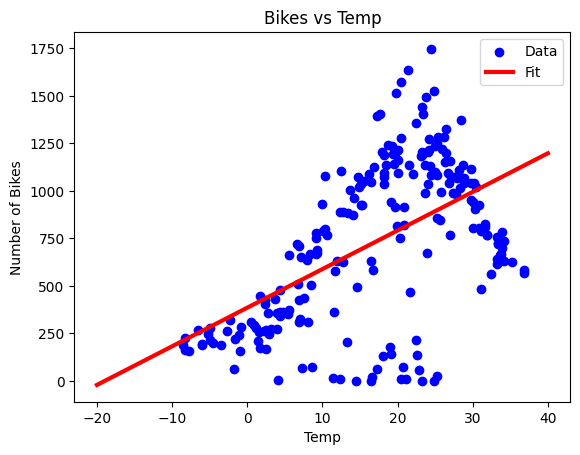

In [30]:
plt.scatter(x_train_temp,y_train_temp,label="Data",color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

In [31]:
df.columns

Index(['count', 'Temperature', 'Humidity', 'Dew Point Temp', 'Radiation',
       'Rain', 'Snow'],
      dtype='object')

In [87]:
#Multiple Linear Regression
_,x_train_all,y_train_all = get_xy(train,"count",x_label = df.columns[1:])
_,x_valid_all,y_valid_all = get_xy(val,"count",x_label =  df.columns[1:])
_,x_test_all,y_test_all = get_xy(test,"count",x_label =  df.columns[1:])

In [35]:
all_reg = LinearRegression()
all_reg.fit(x_train_all,y_train_all)

LinearRegression()

In [36]:
all_reg.score(x_test_all,y_test_all)

0.4002400674308694

In [47]:
# Regression with Neural Network
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))

In [51]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [52]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

In [56]:
def plot_loss(history):
  
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [60]:
history = temp_nn_model.fit(x_train_temp.reshape(-1),y_train_temp,
                            verbose=0,
                            epochs =1000,
                            validation_data=(x_valid_temp,y_valid_temp))

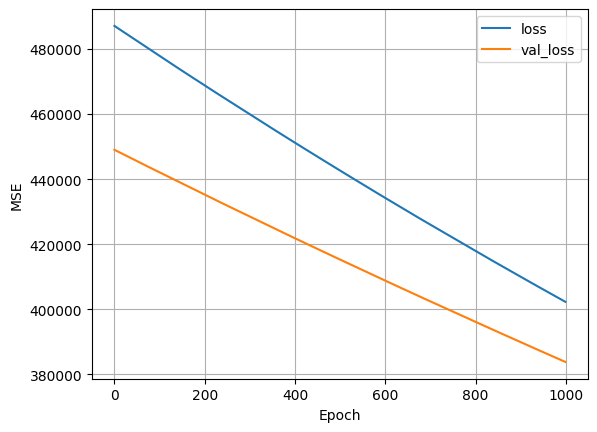

In [61]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


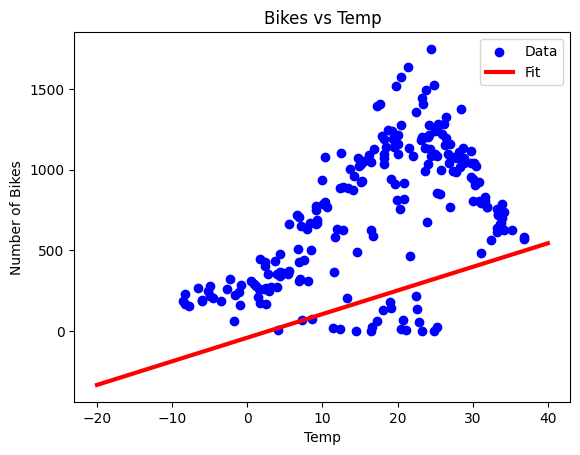

In [62]:
plt.scatter(x_train_temp,y_train_temp,label="Data",color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

In [80]:
#Regression in deep neural net
# Regression with Neural Network
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(x_train_temp.reshape(-1))
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [81]:
history = nn_model.fit(
    x_train_temp,y_train_temp,
    validation_data=(x_valid_temp,y_valid_temp),
    verbose=0,
    epochs=100
)

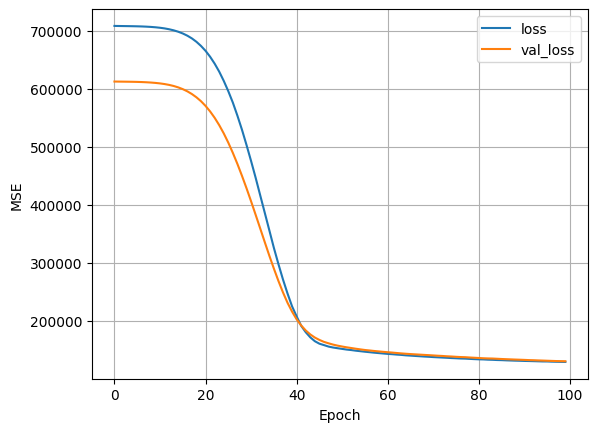

In [82]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


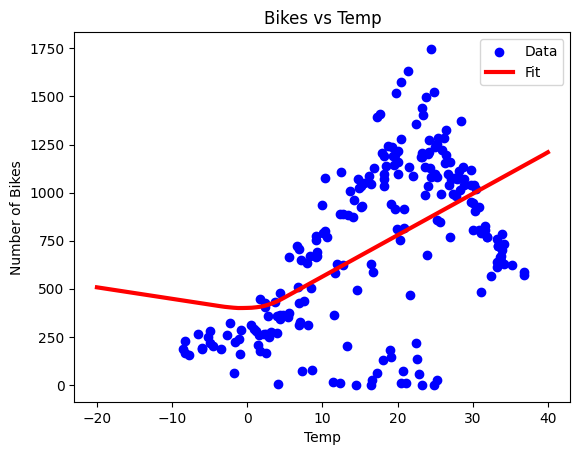

In [83]:
plt.scatter(x_train_temp,y_train_temp,label="Data",color="blue")
x = tf.linspace(-20,40,100)
plt.plot(x,nn_model.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of Bikes")
plt.xlabel("Temp")
plt.show()

In [98]:
#Regression in deep neural net
# Regression with Neural Network
all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=None)
all_normalizer.adapt(x_train_all)
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [99]:
history = nn_model.fit(
    x_train_all,y_train_all,
    validation_data=(x_valid_all,y_valid_all),
    verbose=0,
    epochs=100
)

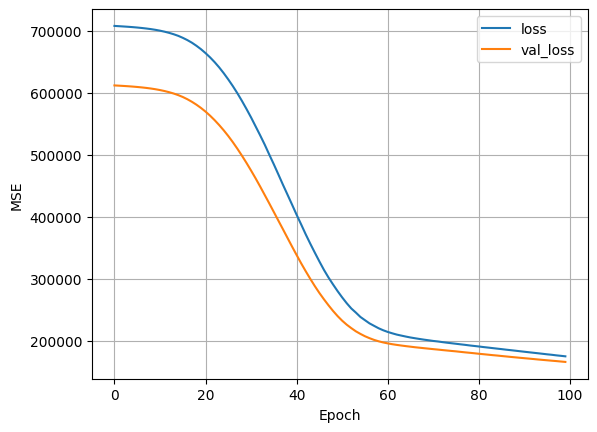

In [100]:
plot_loss(history)

In [101]:
all_reg.score(x_test_all,y_test_all)

0.4002400674308694

In [102]:
y_pred=all_reg.predict(x_test_all)

In [103]:
#calculate the MSE for both linear regressor and nn
y_pred_lr=all_reg.predict(x_test_all)
y_pred_nn = nn_model.predict(x_test_all)

3/3 [==============================] - 0s 5ms/step


In [109]:
def MSE(y_pred,y_real):
  return np.square(y_pred-y_real).mean()

In [111]:
MSE(y_pred_lr,y_test_all)

108825.23956952505

In [112]:
MSE(y_pred_nn,y_test_all)

162772.6121495681

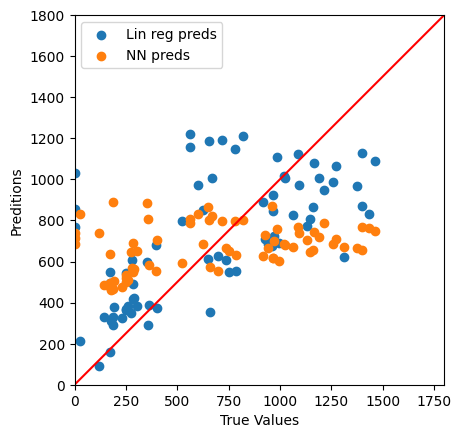

In [116]:
ax = plt.axes(aspect='equal')
plt.scatter(y_test_all,y_pred_lr, label='Lin reg preds')
plt.scatter(y_test_all,y_pred_nn, label='NN preds')
plt.xlabel("True Values")
plt.ylabel("Preditions")
lims = (0,1800)
plt.legend()
plt.xlim(lims)
plt.ylim(lims)
_=plt.plot(lims,lims,c='red')